In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys

print(sys.path)

['', '/home/caleml/partial-labels/experiments/notebooks', '/home/caleml/partial-labels', '/usr/lib/python34.zip', '/usr/lib64/python3.4', '/usr/lib64/python3.4/plat-linux', '/usr/lib64/python3.4/lib-dynload', '/home/caleml/.local/lib/python3.4/site-packages', '/usr/lib64/python3.4/site-packages', '/usr/lib64/python3.4/_import_failed', '/usr/lib/python3.4/site-packages', '/usr/lib/python3.4/site-packages/IPython/extensions', '/home/caleml/.ipython']


In [5]:
import numpy as np
import tensorflow as tf

In [6]:
from data.pascalvoc.pascalvoc import PascalVOC, NB_CLASSES

In [7]:
from model.networks.baseline import Baseline
from model import metrics

In [8]:
import sklearn
sklearn.__version__

'0.20.2'

In [9]:
from experiments.launch import parse_options_file
from config import config_utils

## val dataset

In [7]:
dataset_path = '/share/DEEPLEARNING/datasets/pascalvoc/'
dataset_val = PascalVOC(dataset_path, 2510, 'val', x_keys=['image'], y_keys=['multilabel'])
print(len(dataset_val))

1


In [8]:
x_val, y_val = dataset_val[0]

## eval

In [26]:
# partial_folder = '/home/caleml/partial_experiments/exp_20190624_1613_baseline'
partial_folder = '/home/caleml/partial_experiments/exp_20190627_1641_baseline'
model_weights = {
    # 'model_10': os.path.join(partial_folder, 'weights_10_006.h5'),
    # 'model_20': os.path.join(partial_folder, 'weights_20_020.h5'),
    # 'model_30': os.path.join(partial_folder, 'weights_30_003.h5'),
    'model_100': '/home/caleml/partial_experiments/exp_20190621_1834_baseline/weights_007.h5'
}

In [27]:
# config loading
# conf = parse_options_file(os.path.join(partial_folder, 'config.yaml'))
conf = parse_options_file('/home/caleml/partial-labels/config/baseline101.yaml')
config_utils.update_config(conf)


Loaded config

{'archi': {'classifier': 'resnet101', 'loss': 'bce', 'name': 'baseline'},
 'batch_size': 8,
 'dataset': {'name': 'pascalvoc',
             'path': '/share/DEEPLEARNING/datasets/pascalvoc/'},
 'training': {'n_epochs': 20}}



In [28]:
# eval loop

for model_name, model_path in model_weights.items():
    print('Doing model %s' % model_name)  
    model = Baseline(None, NB_CLASSES)
    model.load_weights(model_path)
    
    y_pred = model.predict(x_val)
    print('y pred example %s' % str(y_pred[0]))
    
    map_metric = metrics.MAP()
    map_2 = metrics.calculate_map(y_val[0], y_pred)
    print('map2 %s' % map_2)
    ap_scores = map_metric.compute_separated(y_val[0], y_pred)
    # ap_scores = map_metric.compute_separated(y_pred, y_val[0])
    print('ap scores for %s: %s' % (model_name, str(ap_scores)))
    map_score = sum(ap_scores) / len(ap_scores)

    print('%s: %s' % (model_name, map_score))

Doing model model_100
Outputs shape (None, 20)
Final model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 448, 448, 3)       0         
_________________________________________________________________
cls_model (Model)            (None, 14, 14, 2048)      42658176  
_________________________________________________________________
flatten_5 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                8028180   
Total params: 50,686,356
Trainable params: 50,581,012
Non-trainable params: 105,344
_________________________________________________________________
y pred example [0.05703787 0.03876966 0.06486665 0.02170656 0.06401902 0.03992372
 0.23413308 0.05507912 0.07292669 0.02245397 0.03004029 0.11245652
 0.06244062 0.03530599 0.33977216 0.0383

In [ ]:
# print(y_val)
print(type(y_val[0]))
print(y_val[0].shape)
print(y_pred_100.shape)

print(y_pred_100[-1])
print(y_pred_100[2])

print(y_pred_10[-1])
print(y_pred_10[2])

print(y_pred_20[-1])
print(y_pred_20[2])

In [20]:
print(y_val[0][0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## plot mAP

In [10]:
folder = '%s/partial_experiments/exp_20190628_0305_TEST_script' % os.environ['HOME']

In [13]:
from pprint import pprint

In [14]:
maps = dict()
exp_pct = 0
exp_maps = None

with open(os.path.join(folder, 'map.csv'), 'r') as f_in:
    for line in f_in:
        parts = line.split(',')
        epoch = parts[0]
        mAP = parts[1]
        
        if int(epoch) == 0:
            if exp_maps is not None:
                maps[exp_pct] = exp_maps
            
            exp_pct += 10
            exp_maps = list()
        
        exp_maps.append(mAP)
        
pprint(maps)
            
            
            
        

{10: ['0.082854',
      '0.090330',
      '0.077200',
      '0.074622',
      '0.086840',
      '0.087163',
      '0.099346',
      '0.103206',
      '0.097967',
      '0.098725',
      '0.094966',
      '0.106462',
      '0.092181',
      '0.100632',
      '0.104738',
      '0.093290',
      '0.098259',
      '0.089205',
      '0.089280',
      '0.094230'],
 20: ['0.079084',
      '0.129775',
      '0.082999',
      '0.147525',
      '0.151059',
      '0.138826',
      '0.133107',
      '0.140380',
      '0.144374',
      '0.153689',
      '0.155001',
      '0.122372',
      '0.149584',
      '0.151518',
      '0.144176',
      '0.154426',
      '0.152721',
      '0.155205',
      '0.135074',
      '0.154221'],
 30: ['0.081828',
      '0.269140',
      '0.193136',
      '0.278663',
      '0.274600',
      '0.082818',
      '0.234682',
      '0.284238',
      '0.186499',
      '0.208869',
      '0.261126',
      '0.302739',
      '0.307479',
      '0.296791',
      '0.314388',
      '0

In [15]:
mAP_100 = 0.69

In [19]:
import matplotlib
import matplotlib.pyplot as plt

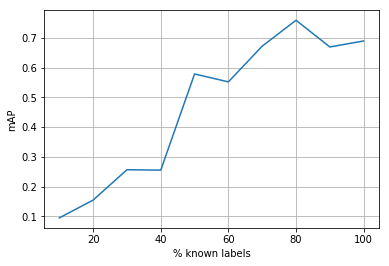

In [24]:
# Data for plotting
x = sorted(list(maps.keys()))
y = [float(maps[k][-1]) for k in x]

x += [100]
y += [mAP_100]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='% known labels', ylabel='mAP')
ax.grid()

fig.savefig("test.png")
plt.show()